<img src="seminarlogo.png" class="center" style="width:100%;"> </img>

# <span style="color:navy"> **Seminar Project:** </span> <span style="color:green"> **MRSP**</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style = "color: navy"> **General Procedure:** </span>
1. The seminar project is group (team) based assignment with each group consists of Five (05) members
2. Each group is assigned same Seminar project, hence, it is a sort of competition among the groups and the grades are based on the best performance of the group. The points for the project assignment will be distribute among the group member on different weights depends on the indivisual performance.
3. There is one group coordinator, who is reponsible for the coordination among the members and responsible for report and results along with establishing the repository (such as GIT)
4. The duration of the seminar project is from **01.06.2024** to **31.07.2024**, with a mid-term meeting with each group from **01.07.2024** to **06.07.2024** (*Book an appointment at your convience*)
5. There will be a report at the end of project. The submission date for the report is **31.07.2024**
6. The report and results presentation will held from **01.08.2024** to **15.08.2024** (The specific date for each group will be selected after mutual consensus)

<span style="color:blue"> Note: Further Instructions and procedures may be updated from time to time</span>
    
</div>

### <span style = "color: navy"> **Introduction:** </span>
The main aim of the seminar project is to find out the perceptual similarities between different audio stimuli by calculating an objective measure **Perceptual Loss Function** and a subjective measure using **MUSHRA** listening experiment  
The project is divided into five major tasks and for each part there is one student responsible for it. The Tasks are:
#### <span style = "color: navy"> 1. Preparing audio data </span>
- Prepare five dry audio files with $24$ bit rate and sample rate of either $44100$ Hz or $48000$ Hz. These audios should have distinct spectral charecteristics from each other, which means select the five differnt audio file such as (e.g.), i) Drum ii) Speach iii) Piano Music iv) Mix Instrumental Music v) Trumpet. (These are just examples, you are free to choose the audio file). But Important point is these audios should be dry (without any sound effects, such as reverberation etc.)
- From these five audios generate three versions of each with i) Small Office Environment ii) Opera Hall iii) Reverb hall with reverberation time at least 1.5 sec.
- In this way you have $20$ audio files in total and $5$ groups and each group contains $4$ version of single audio
#### <span style = "color: navy"> 2. **Perceptual Loss** Objective Measure (five groups) </span>
- You need to use the GIT repository for this purpose, which is available at (https://github.com/TUIlmenauAMS/PsychoacousticLoss)
#### <span style = "color: navy"> 3. MUSHRA: Subjective measures: </span>
- Prepare the software for the listening experiment using **MUSHRA** test. The GIT repositor is available at (https://github.com/audiolabs/webMUSHRA)
#### <span style = "color: navy"> 4. Listening experiment management </span>
- Conduct a listening experiment with the DSM Course students which will be availbe during first and second week of the July. You have to coordinate with the students.
- Make a coordination with the listening experiment room responsible people (This will be done including us)
#### <span style = "color: navy"> 5. Report and Coordination </span>
- The group coordinator will be responsible for the coordination and final report submission
- The group coordinator will communicate with the Listening Experiment Facility Management
- Other corodination

#### <span style="color:blue"> Further details will be discussed with the group coordinators and the they are responsible for group coordination</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 01:** Preparing audio data </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [ ]:
MatriculationNumber = '66546';

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

We will use room impulse responses (RIRs) from the MIT database to simulate different acoustic environments for our original audio files. These environments include a small office, an auditorium, and a movie theater. Our original audio files are in stereo with a 24-bit depth, while the RIRs are in 32-bit depth. To apply reverberation, we will perform convolution on the original audio files using the RIRs, effectively transforming the audio to reflect the characteristics of these environments.

In [134]:
# Place to write your codes etc.
# YOUR CODE HERE
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import fftconvolve
from pydub import AudioSegment
import os

audio_file_paths = {
    "Trumpet": "..\\Task1\\audios\\Trumpet.wav",
    "Jazz": "..\\Task1\\audios\\Jazz.wav",
    "violin": "..\\Task1\\audios\\violin.wav",
    "accordion": "..\\Task1\\audios\\accordion.wav",
    "guitar": "..\\Task1\\audios\\guitar.wav"
}

rir_file_paths = {
    "small_office": "..\\Task1\\RIR\\h005_Office_Small_44txts.wav",
    "Auditorium": "..\\Task1\\RIR\\h252_Auditorium_1txts.wav",
    "Movie_Theater": "..\\Task1\\RIR\h115_MovieTheater_1txts.wav"
}

In [135]:
def load_audio(file_path):
    sample_rate, data = wavfile.read(file_path)
    return sample_rate, data

def convolve_audio(audio, rir):
    if audio.ndim == 1:  # Mono
        return fftconvolve(audio, rir, mode='full')
    else:  # Stereo
        return np.array([fftconvolve(channel, rir, mode='full') for channel in audio.T]).T

In [136]:
def normalize_audio(audio):
    # Normalize the audio to the range -1 to 1
    return audio / np.max(np.abs(audio))

In [137]:
rirs = {key: load_audio(path)[1] for key, path in rir_file_paths.items()}

# Process each audio file with each RIR
for audio_key, audio_path in audio_file_paths.items():
    sample_rate, audio_data = load_audio(audio_path)
    for rir_key, rir_data in rirs.items():
        processed_audio = convolve_audio(audio_data, rir_data)
        processed_audio = np.int16(processed_audio / np.max(np.abs(processed_audio)) * 32767)
        #processed_audio = normalize_audio(processed_audio)
        output_path = f"output\\{audio_key}_{rir_key}.wav"
        wavfile.write(output_path, sample_rate, processed_audio)

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 02:** Perceptual Loss: Objective Measures</span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [138]:
MatriculationNumber = '65896'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

In this task we will be calculating perceptual loss of different audio environments and saving them is a CSV file. We will calculte the perceptual loss using the psycho-acoustic torch loss function. Below is the code that calcultes psycho-acoustic loss.

#### Importing All Libraries

In [139]:
# Place to write your codes etc.
# YOUR CODE HERE
import sys

!git clone https://github.com/TUIlmenauAMS/Python-Audio-Coder

currentpath=sys.path[0]
sys.path.append(currentpath+'/Python-Audio-Coder')
sys.path.append(currentpath+'/PsychoacousticLoss')
sys.path.append(currentpath+'/Python-Audio-Coder/PythonPsychoacoustics')

import os
import scipy.io.wavfile as wav 
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub import AudioSegment
from pydub.playback import play
import psyacloss
import numpy as np

fatal: destination path 'Python-Audio-Coder' already exists and is not an empty directory.


We will create a list of audio files using list comprehension and os module

In [140]:
filepath = "..\\Task1\\"
wav_files = [f for f in os.listdir(os.path.join(filepath, 'output')) if f.endswith('.wav')]
wav_files

['accordion.wav',
 'accordion_Auditorium.wav',
 'accordion_Movie_Theater.wav',
 'accordion_small_office.wav',
 'guitar.wav',
 'guitar_Auditorium.wav',
 'guitar_Movie_Theater.wav',
 'guitar_small_office.wav',
 'jazz.wav',
 'jazz_Auditorium.wav',
 'jazz_Movie_Theater.wav',
 'jazz_small_office.wav',
 'Trumpet.wav',
 'Trumpet_Auditorium.wav',
 'Trumpet_Movie_Theater.wav',
 'Trumpet_small_office.wav',
 'violin.wav',
 'violin_Auditorium.wav',
 'violin_Movie_Theater.wav',
 'violin_small_office.wav']

Plotting all the audio files

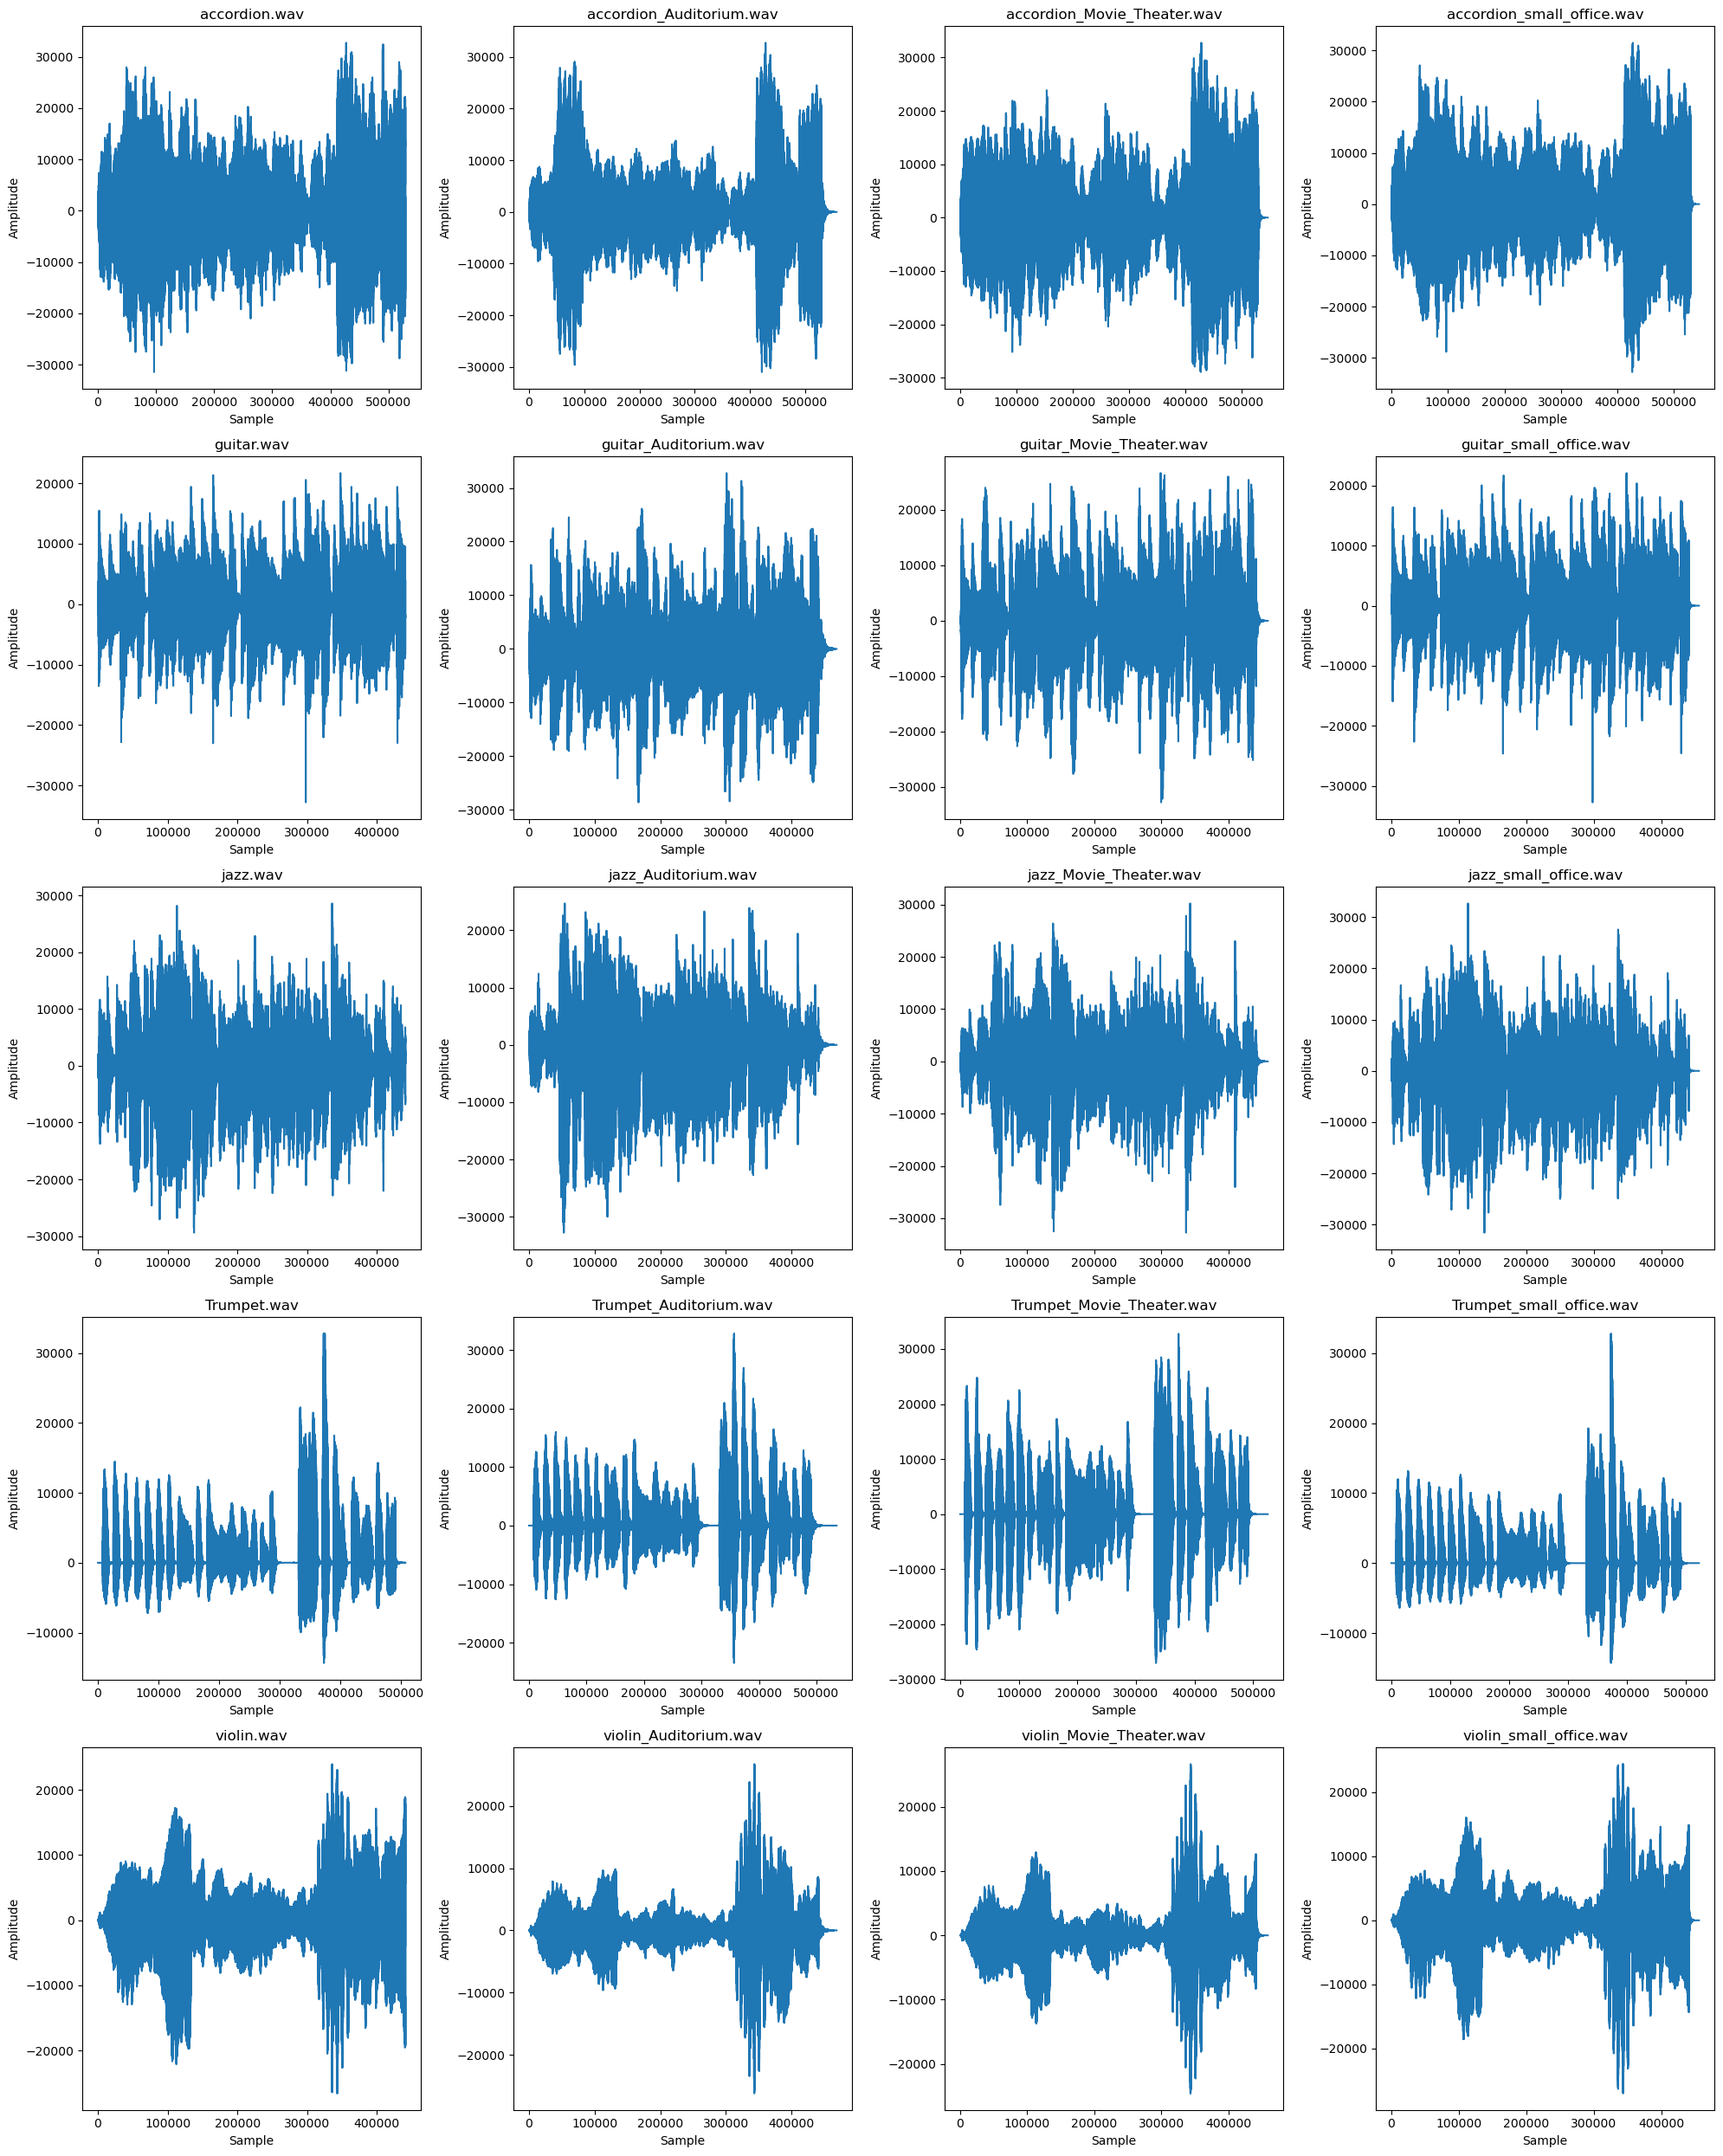

In [142]:
n_files = len(wav_files)
n_cols = 4
n_rows = int(np.ceil(n_files / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, wav_file in enumerate(wav_files):
    fs, data = wav.read(os.path.join(filepath, 'output', wav_file))
    axes[i].plot(data[:,1])
    axes[i].set_title(wav_file)
    axes[i].set_xlabel('Sample')
    axes[i].set_ylabel('Amplitude')
    
for ax in axes[n_files:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


Creating different lists for different audios

In [192]:
accordian = []
violin = []
guitar = []
trumpet = []
jazz = []

for wav_file in wav_files:
    if wav_file.startswith('accordion'):
        accordian.append(wav_file)
    elif wav_file.startswith('violin'):
        violin.append(wav_file)
    elif wav_file.startswith('guitar'):
        guitar.append(wav_file)
    elif wav_file.startswith('Trumpet'):
        trumpet.append(wav_file)
    elif wav_file.startswith('jazz'):
        jazz.append(wav_file)
print(accordian)
print(violin)
print(guitar)
print(trumpet)
print(jazz)

['accordion.wav', 'accordion_Auditorium.wav', 'accordion_Movie_Theater.wav', 'accordion_small_office.wav']
['violin.wav', 'violin_Auditorium.wav', 'violin_Movie_Theater.wav', 'violin_small_office.wav']
['guitar.wav', 'guitar_Auditorium.wav', 'guitar_Movie_Theater.wav', 'guitar_small_office.wav']
['Trumpet.wav', 'Trumpet_Auditorium.wav', 'Trumpet_Movie_Theater.wav', 'Trumpet_small_office.wav']
['jazz.wav', 'jazz_Auditorium.wav', 'jazz_Movie_Theater.wav', 'jazz_small_office.wav']


Defining psycho-acoustic loss function.

In [193]:
import torch
import psyacloss_torch

def per_loss(aud1, aud2):
    min_length = min(aud1.shape[0], aud2.shape[0])

    snd1 = aud1[:min_length]
    snd2 = aud2[:min_length]

    ploss=psyacloss_torch.percloss(torch.from_numpy(snd1[:, 0]).float(), torch.from_numpy(snd2[:, 0]).float(), fs = 2 * np.pi)
    
    return ploss

Creating audio_loss function that takes list of audios as parameter. It will compare original audio with its other environment audios plot there graph, calculate the loss and saves it in CSV file

In [194]:
import csv

def audio_loss(list_of_files):

    fig, axes = plt.subplots(3, 1, figsize=(10, 5 * 3))
    losses = []

    for i, wav_file in enumerate(list_of_files):
        file_path = os.path.join(filepath, 'output', wav_file)
        if wav_file == str(list_of_files[0]):
            fs, org = wav.read(file_path)
            
        else:
            fs, snd = wav.read(file_path)
        if i > 0:
            loss = per_loss(org, snd)
            print(f'Loss between {wav_file} and {list_of_files[0]} is {loss}')
            losses.append((wav_file, float(loss)))
            axes[i-1].plot(org[:, 0])
            axes[i-1].plot(snd[:, 0],alpha=0.8)
            axes[i-1].set_title(f'Original vs. {wav_file}')  

        
    for ax in axes[n_files:]:
        fig.delaxes(ax)  
            
    plt.tight_layout()
    plt.show()
    new_file_path = '..\\Task2\\'
    csv_file_path = os.path.join(new_file_path, 'output', 'losses.csv')
    file_exists = os.path.isfile(csv_file_path)
    
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File', 'Loss'])
        writer.writerows(losses)
    
    print(f'Losses saved to {csv_file_path}')
           

Calling audio_loss() function with different audios list

Loss between Trumpet_Auditorium.wav and Trumpet.wav is 0.719163179397583
Loss between Trumpet_Movie_Theater.wav and Trumpet.wav is 1.0728094577789307
Loss between Trumpet_small_office.wav and Trumpet.wav is 0.20507767796516418


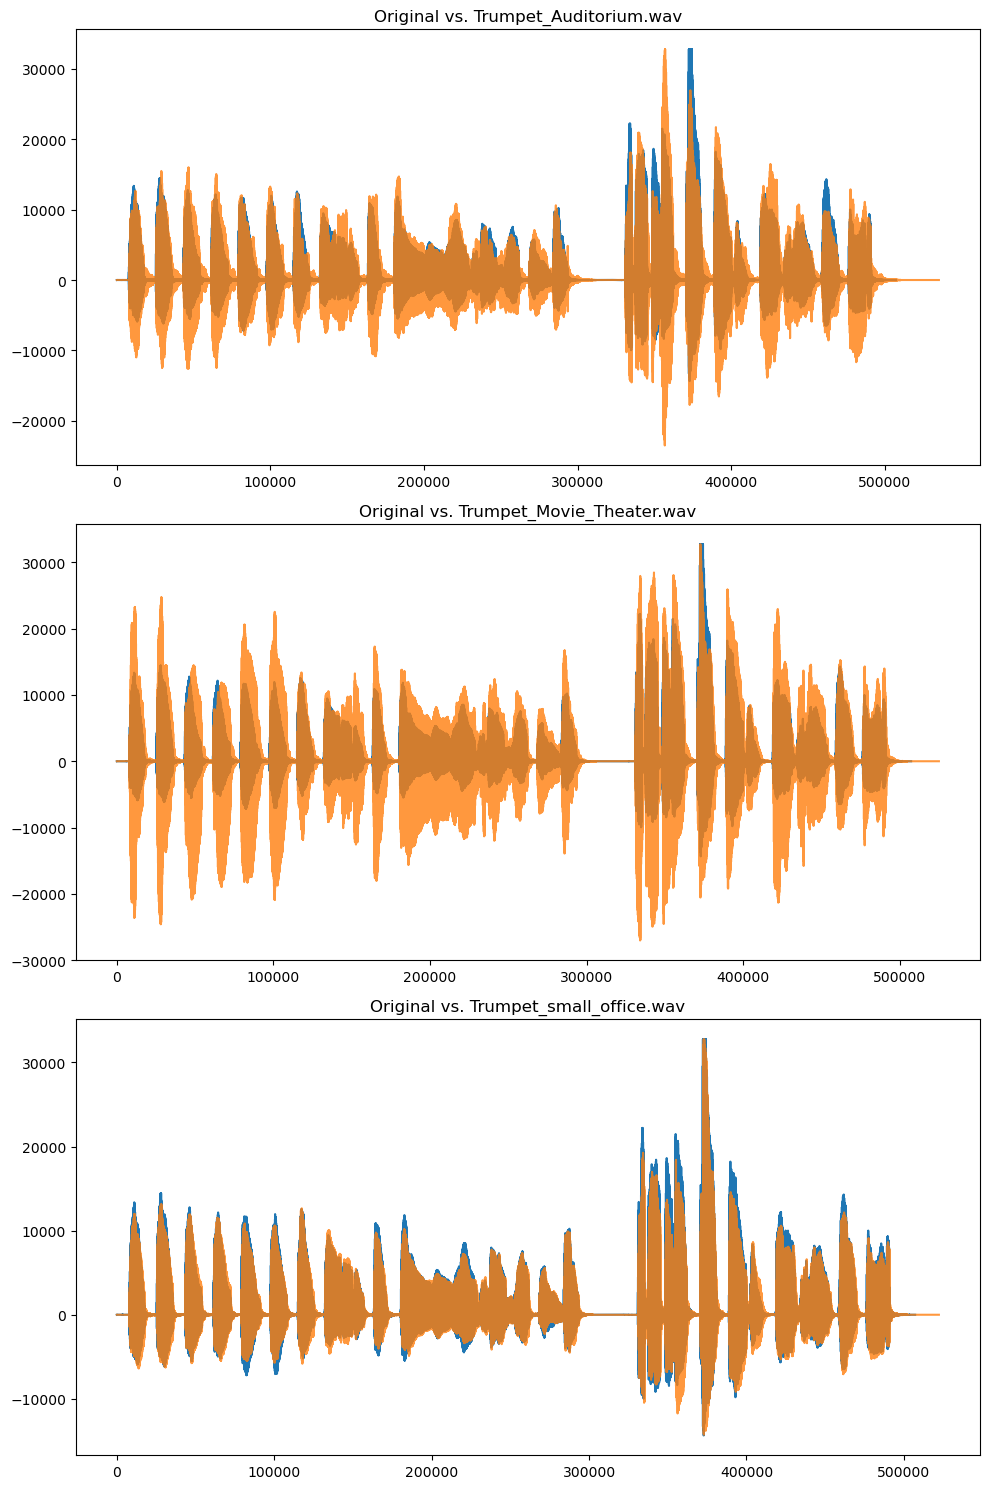

Losses saved to ..\Task2\output\losses.csv
Loss between violin_Auditorium.wav and violin.wav is 0.1046823039650917
Loss between violin_Movie_Theater.wav and violin.wav is 0.18730027973651886
Loss between violin_small_office.wav and violin.wav is 0.22236931324005127


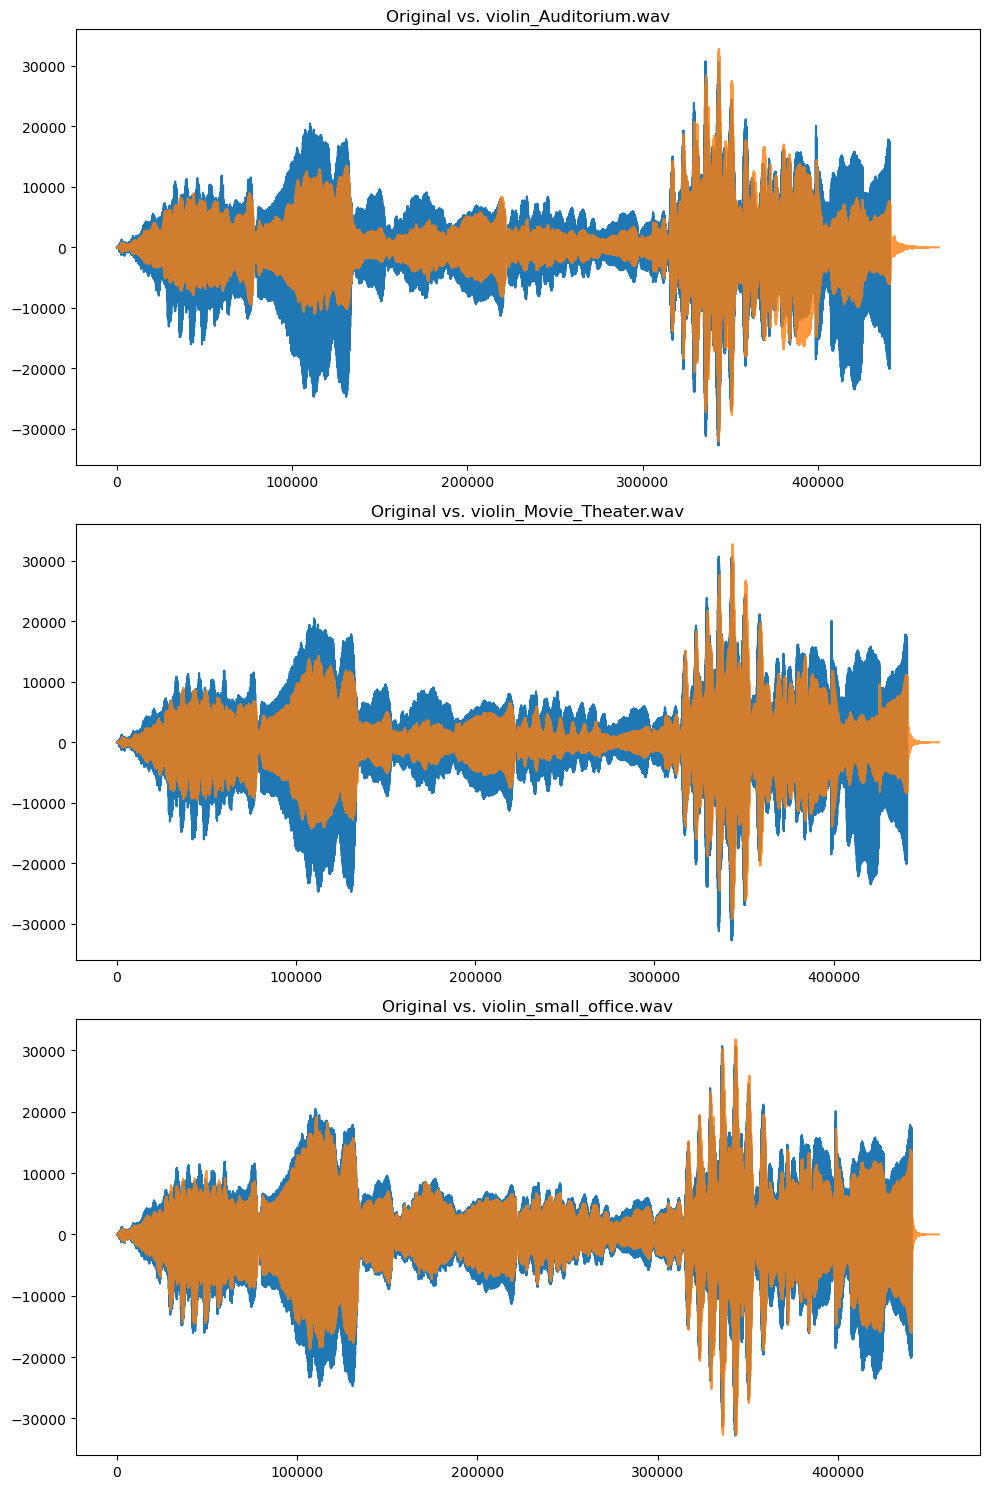

Losses saved to ..\Task2\output\losses.csv
Loss between guitar_Auditorium.wav and guitar.wav is 0.8067110180854797
Loss between guitar_Movie_Theater.wav and guitar.wav is 0.4992562234401703
Loss between guitar_small_office.wav and guitar.wav is 0.3271140158176422


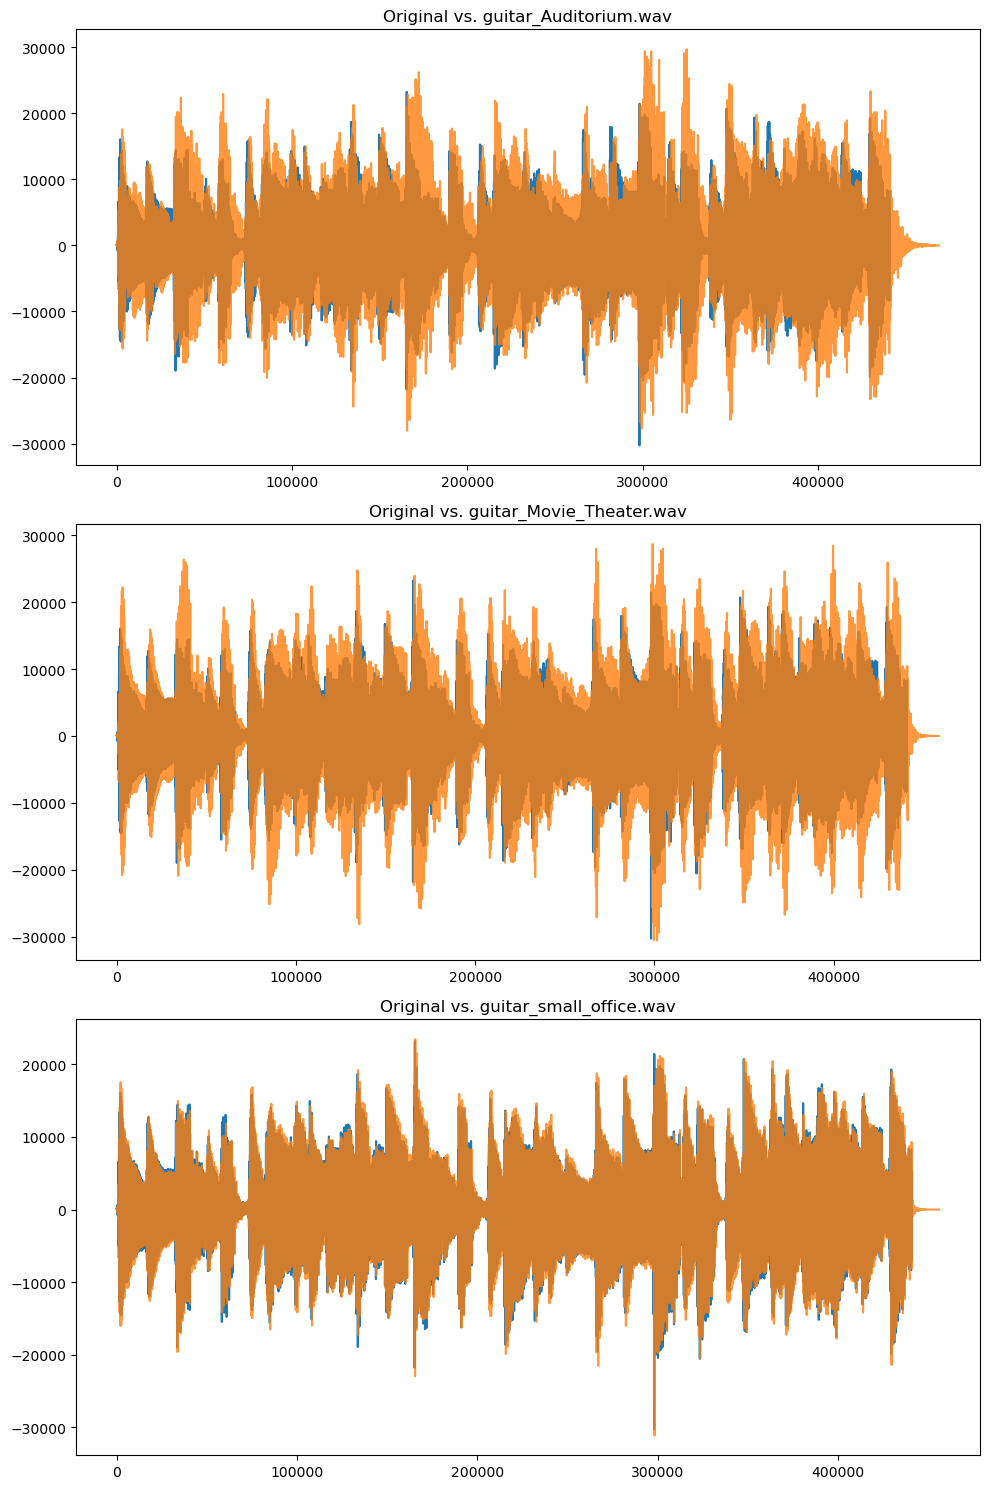

Losses saved to ..\Task2\output\losses.csv
Loss between accordion_Auditorium.wav and accordion.wav is 0.21467021107673645
Loss between accordion_Movie_Theater.wav and accordion.wav is 0.18565838038921356
Loss between accordion_small_office.wav and accordion.wav is 0.2827697992324829


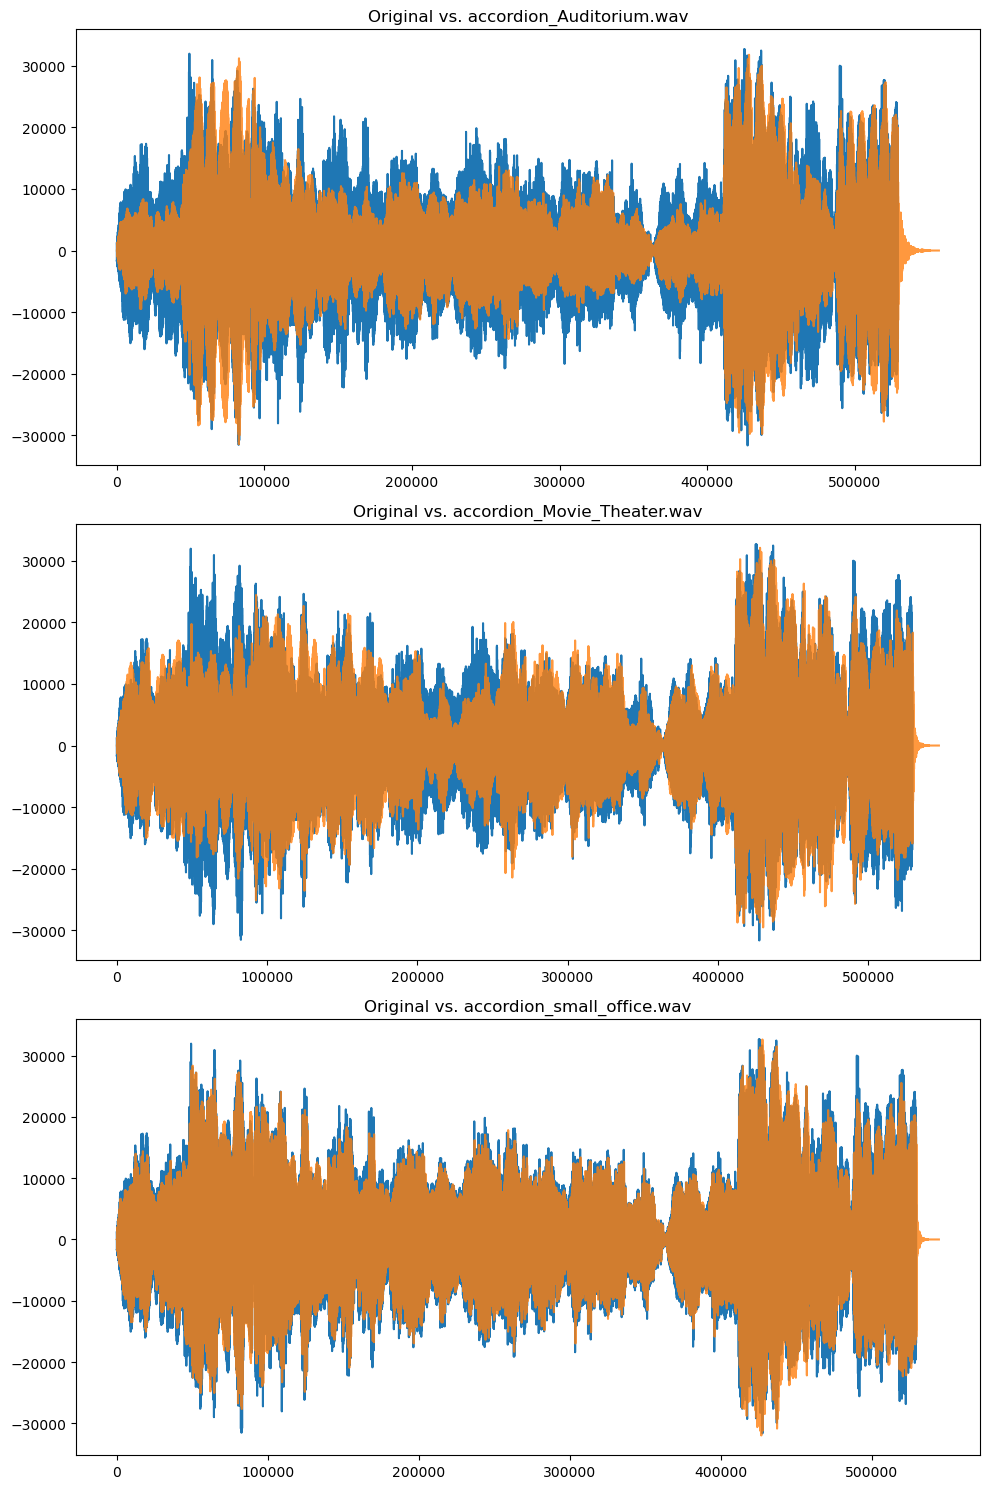

Losses saved to ..\Task2\output\losses.csv
Loss between jazz_Auditorium.wav and jazz.wav is 0.16224178671836853
Loss between jazz_Movie_Theater.wav and jazz.wav is 0.15441691875457764
Loss between jazz_small_office.wav and jazz.wav is 0.2199694812297821


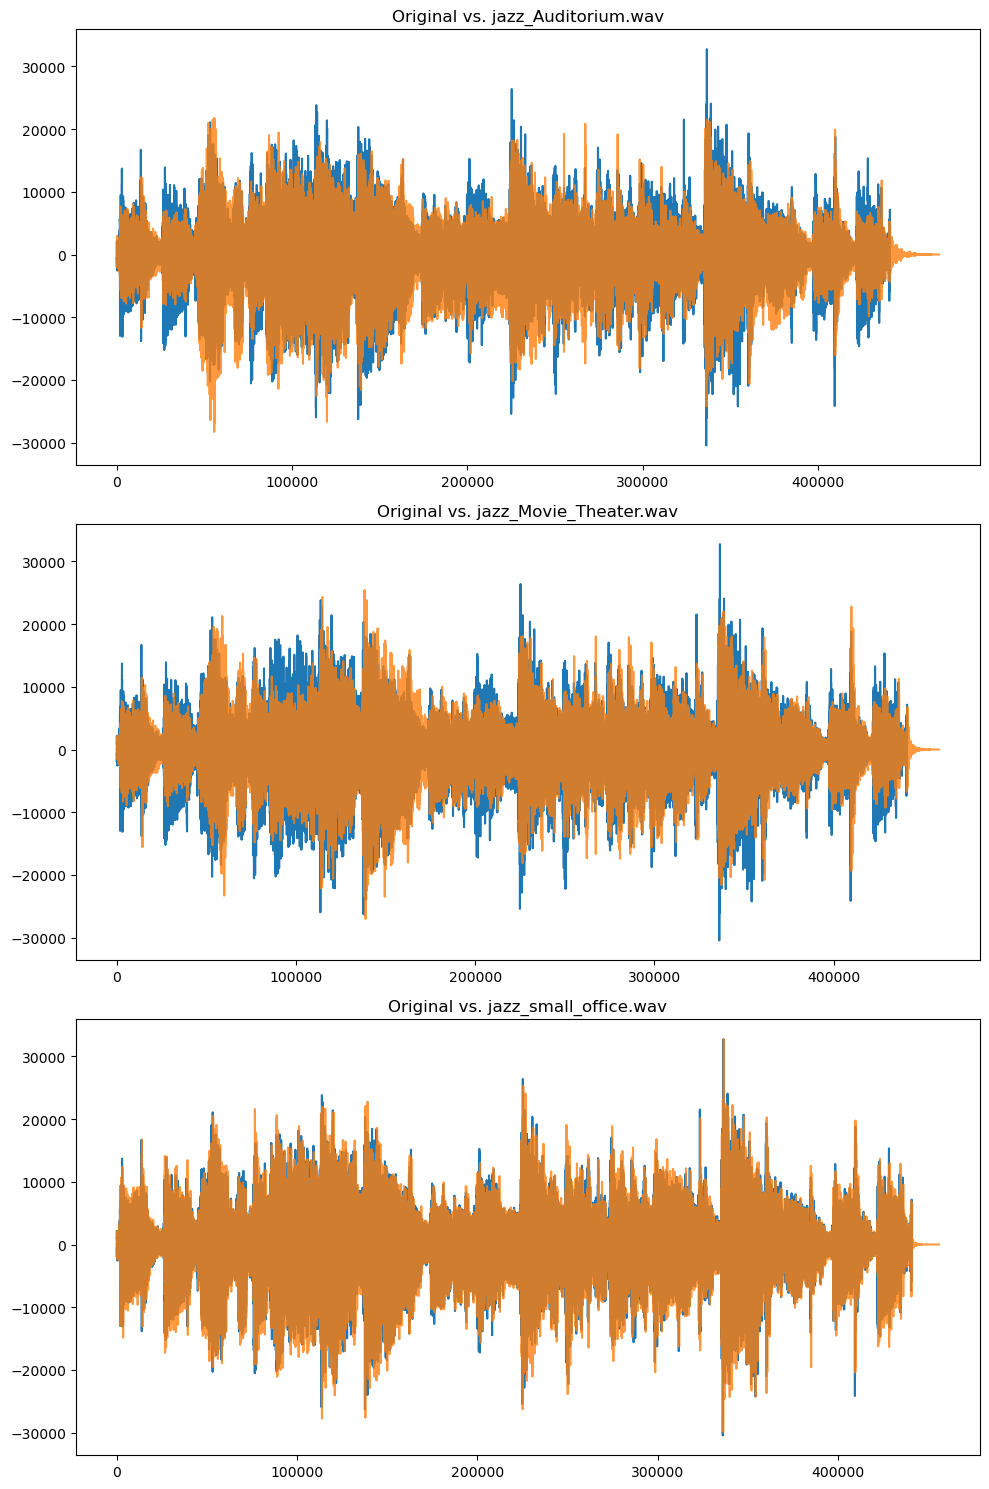

Losses saved to ..\Task2\output\losses.csv


In [195]:
audio_loss(trumpet)
audio_loss(violin)
audio_loss(guitar)
audio_loss(accordian)
audio_loss(jazz)

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 03:** MUSHRA: Subjective Measures </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [147]:
MatriculationNumber = '65428'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

Place to describe the task, procedure, results etc. (delete this line when writting)

This task is to compare original audio with its different audio environments subjectivly. We developed this Mushra test in Scale. Scale is a matlab application used to create, perform and analyse different audio tests. These audio tests also include mushra test which we developed.

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">
    
### <span style="color:navy; font-size: 1.25em"> **TASK 04:** Listening experiment </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [148]:
MatriculationNumber = '66377'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

In this task the Mushra test was conducted using the developed mushra test in task 3. In our case there were 20 participants 4 female and 16 male. All the participants were given a small breifing on how to rate the audios. They were told to compare only the original audio or the referenced audio to the other audios. After comparing they have to rate the how similar both audios were. 100 means completly same and 0 means completly different.

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 05:** Report and Coordination </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [149]:
MatriculationNumber = '65374'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

In this task we will be analyzing task 2 results with task 4 results. We will see if there is any relation between subjective measures and objective measures. We will start by importing the .mat file which includes task 4 ratings and losses.csv file which contains objective values of losses.

In [196]:
# Place to write your codes etc.
# YOUR CODE HERE
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

mat_file_path = '..\\Task4\\Audio.mat'
mat_data = scipy.io.loadmat(mat_file_path)

print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'data_subs', '__function_workspace__'])


In [197]:
data_subs = mat_data['data_subs']

In [198]:
data_subs_content = data_subs[0, 0]
print(data_subs_content.dtype.names)

('subjectID', 'resultsCode', 'Surname', 'Name', 'Gender', 'Country', 'Age', 'Experience', 'Audio_Knowledge', 'Hearing_Problems', 'Scen1', 'Scen2', 'Scen3', 'Scen4', 'Scen5')


We will convert .mat file to CSV file so we can easily use it for our analysis. The data stored in .mat file is as in the form of array or list in Scen1, Scen2, Scen3, Scen4 and Scen5. Where Scen1[0] is Accordian_Original. When we will convert it to CSV where Scen1[0] will be scen1_col1 it will be easy to change the name of the header and plot graphs accodingly. Below are the steps of converting it to CSV and then changing the headers and again saving it in CSV file format

In [199]:
flattened_data = {}

for name in ['subjectID', 'resultsCode', 'Surname', 'Name', 'Gender', 'Country', 'Age', 'Experience', 'Audio_Knowledge', 'Hearing_Problems']:
    field_data = data_subs_content[name]
    if field_data.ndim > 1:
        flattened_data[name] = [item[0] for item in field_data]
    else:
        flattened_data[name] = field_data


for scen in ['Scen1', 'Scen2', 'Scen3', 'Scen4', 'Scen5']:
    scen_data = data_subs_content[scen]
    for i in range(scen_data.shape[1]):
        column_name = f"{scen}_col{i+1}"
        flattened_data[column_name] = scen_data[:, i]

df = pd.DataFrame(flattened_data)
csv_file_path = 'mushra_grp3.csv'
df.to_csv(csv_file_path, index=False)

csv_file_path

'mushra_grp3.csv'

In [200]:
file_path = 'mushra_grp3.csv'
mushra_data = pd.read_csv(file_path)
mushra_data.head()

,subjectID,resultsCode,Surname,Name,Gender,Country,Age,Experience,Audio_Knowledge,Hearing_Problems,...,Scen3_col3,Scen3_col4,Scen4_col1,Scen4_col2,Scen4_col3,Scen4_col4,Scen5_col1,Scen5_col2,Scen5_col3,Scen5_col4
0,['AbNo0796'],['AbNo079615071304Mu'],['Noor'],['Abdullah'],['Male'],"[(b'', b'MCOS', b'CountryEnum', array([[(array...",28,['no'],['no'],[],...,80,100,100,99,90,100,97,98,99,100
1,['AbRa0299'],['AbRa029915071201Mu'],['Rafay'],['Abdur'],['Male'],"[(b'', b'MCOS', b'CountryEnum', array([[(array...",25,['yes'],['no'],[],...,73,66,71,75,28,59,43,81,63,20
2,['AiAc1096'],['AiAc109615071501Mu'],['Acharya'],['Aindrila'],['Female'],"[(b'', b'MCOS', b'CountryEnum', array([[(array...",27,['no'],['medium'],[],...,65,95,100,85,80,95,85,95,98,90
3,['AlAs0794'],['AlAs079415071313Mu'],['Asif'],['Ali'],['Male'],"[(b'', b'MCOS', b'CountryEnum', array([[(array...",30,['no'],['no'],[],...,100,100,100,100,0,19,100,62,100,100
4,['AsAs0795'],['AsAs079515071154Mu'],['AsadUllah'],['AsadUllah'],['Male'],"[(b'', b'MCOS', b'CountryEnum', array([[(array...",29,['yes'],['no'],[],...,20,47,100,42,22,41,100,30,45,40


In [201]:
column_renames = {
    'Scen1_col1': 'Accordian_Original',
    'Scen1_col2': 'Accordian_Auditorium',
    'Scen1_col3': 'Accordian_Movie_Theater',
    'Scen1_col4': 'Accordian_Small_Office',
    'Scen2_col1': 'Guitar_Original',
    'Scen2_col2': 'Guitar_Auditorium',
    'Scen2_col3': 'Guitar_Movie_Theater',
    'Scen2_col4': 'Guitar_Small_Office',
    'Scen3_col1': 'Jazz_Original',
    'Scen3_col2': 'Jazz_Auditorium',
    'Scen3_col3': 'Jazz_Movie_Theater',
    'Scen3_col4': 'Jazz_Small_Office',
    'Scen4_col1': 'Trumpet_Original',
    'Scen4_col2': 'Trumpet_Auditorium',
    'Scen4_col3': 'Trumpet_Movie_Theater',
    'Scen4_col4': 'Trumpet_Small_Office',
    'Scen5_col1': 'Violin_Original',
    'Scen5_col2': 'Violin_Auditorium',
    'Scen5_col3': 'Violin_Movie_Theater',
    'Scen5_col4': 'Violin_Small_Office',
}
mushra_data.rename(columns=column_renames, inplace=True)

def clean_cell(cell):
    try:
        return cell.strip("[]'\"")
    except AttributeError:
        return cell

mushra_data = mushra_data.applymap(clean_cell)

mushra_data.head()


C:\Users\abuma\AppData\Local\Temp\ipykernel_253520\139573850.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mushra_data = mushra_data.applymap(clean_cell)


,subjectID,resultsCode,Surname,Name,Gender,Country,Age,Experience,Audio_Knowledge,Hearing_Problems,...,Jazz_Movie_Theater,Jazz_Small_Office,Trumpet_Original,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Original,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office
0,AbNo0796,AbNo079615071304Mu,Noor,Abdullah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",28,no,no,,...,80,100,100,99,90,100,97,98,99,100
1,AbRa0299,AbRa029915071201Mu,Rafay,Abdur,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",25,yes,no,,...,73,66,71,75,28,59,43,81,63,20
2,AiAc1096,AiAc109615071501Mu,Acharya,Aindrila,Female,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",27,no,medium,,...,65,95,100,85,80,95,85,95,98,90
3,AlAs0794,AlAs079415071313Mu,Asif,Ali,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",30,no,no,,...,100,100,100,100,0,19,100,62,100,100
4,AsAs0795,AsAs079515071154Mu,AsadUllah,AsadUllah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",29,yes,no,,...,20,47,100,42,22,41,100,30,45,40


In [202]:
csv_file_path = 'Mushra_grp3_renamed.csv'
mushra_data.to_csv(csv_file_path, index=False)

csv_file_path

'Mushra_grp3_renamed.csv'

Once convertion is done now we will import Mushra_grp3_renamed.csv and plot average rating of each environment.

In [203]:
new_file_path = 'Mushra_grp3_renamed.csv'
latest_mushra_data = pd.read_csv(new_file_path)

# Display the first few rows of the new dataset to confirm its contents
latest_mushra_data.head()

,subjectID,resultsCode,Surname,Name,Gender,Country,Age,Experience,Audio_Knowledge,Hearing_Problems,...,Jazz_Movie_Theater,Jazz_Small_Office,Trumpet_Original,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Original,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office
0,AbNo0796,AbNo079615071304Mu,Noor,Abdullah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",28,no,no,NaN,...,80,100,100,99,90,100,97,98,99,100
1,AbRa0299,AbRa029915071201Mu,Rafay,Abdur,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",25,yes,no,NaN,...,73,66,71,75,28,59,43,81,63,20
2,AiAc1096,AiAc109615071501Mu,Acharya,Aindrila,Female,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",27,no,medium,NaN,...,65,95,100,85,80,95,85,95,98,90
3,AlAs0794,AlAs079415071313Mu,Asif,Ali,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",30,no,no,NaN,...,100,100,100,100,0,19,100,62,100,100
4,AsAs0795,AsAs079515071154Mu,AsadUllah,AsadUllah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",29,yes,no,NaN,...,20,47,100,42,22,41,100,30,45,40


{'Original': [], 'Auditorium': [], 'Movie_Theater': [], 'Small_Office': []}


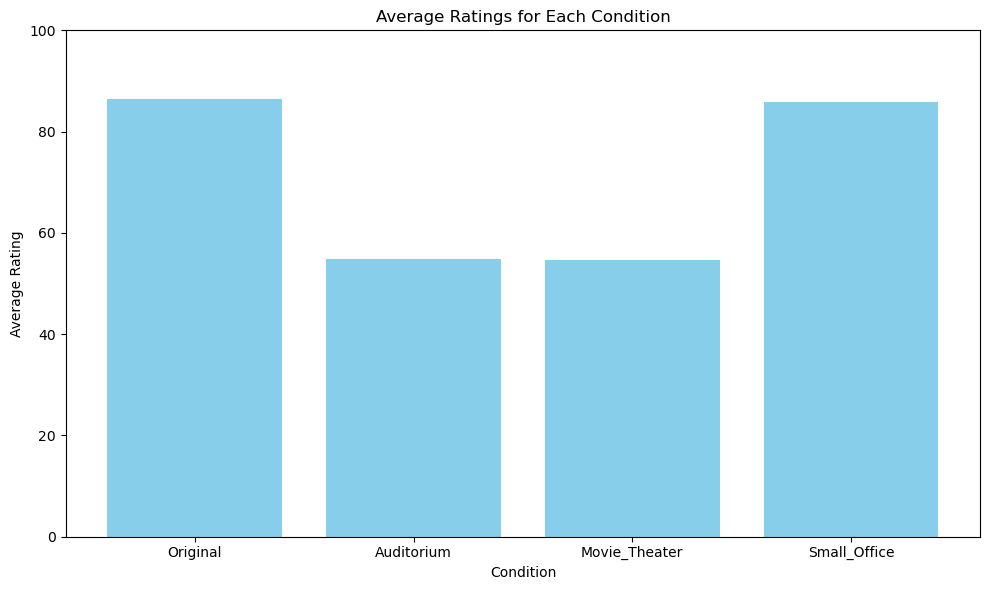

In [204]:
conditions = ['Original', 'Auditorium', 'Movie_Theater', 'Small_Office']

average_ratings = {condition: [] for condition in conditions}
print(average_ratings)
for condition in conditions:
    columns = [col for col in latest_mushra_data.columns if condition in col]
    average_ratings[condition] = latest_mushra_data[columns].mean().mean()

average_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=['Condition', 'Average Rating'])


plt.figure(figsize=(10, 6))
plt.bar(average_ratings_df['Condition'], average_ratings_df['Average Rating'], color='skyblue')
plt.title('Average Ratings for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Average Rating')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Importing losses.csv file

In [205]:
preploss_file_path = '..\\Task2\\output\\losses.csv'
preploss_data = pd.read_csv(preploss_file_path)
preploss_data.head()

,File,Loss
0,Trumpet_Auditorium.wav,0.719163
1,Trumpet_Movie_Theater.wav,1.072809
2,Trumpet_small_office.wav,0.205078
3,violin_Auditorium.wav,0.104682
4,violin_Movie_Theater.wav,0.187300


We can see file and loss headers. We will take transpose to make file names as header and losses there value

In [207]:
losses_transposed = preploss_data.set_index('File').T
losses_transposed.head()

File,Trumpet_Auditorium.wav,Trumpet_Movie_Theater.wav,Trumpet_small_office.wav,violin_Auditorium.wav,violin_Movie_Theater.wav,violin_small_office.wav,guitar_Auditorium.wav,guitar_Movie_Theater.wav,guitar_small_office.wav,accordion_Auditorium.wav,accordion_Movie_Theater.wav,accordion_small_office.wav,jazz_Auditorium.wav,jazz_Movie_Theater.wav,jazz_small_office.wav
Loss,0.719163,1.072809,0.205078,0.104682,0.1873,0.222369,0.806711,0.499256,0.327114,0.21467,0.185658,0.28277,0.162242,0.154417,0.219969


We will need to rename the columns to campare obective and subjective measures

In [208]:
column_renames = {
    'accordion_Auditorium.wav': 'Accordian_Auditorium',
    'accordion_Movie_Theater.wav': 'Accordian_Movie_Theater',
    'accordion_small_office.wav': 'Accordian_Small_Office',
    'guitar_Auditorium.wav': 'Guitar_Auditorium',
    'guitar_Movie_Theater.wav': 'Guitar_Movie_Theater',
    'guitar_small_office.wav': 'Guitar_Small_Office',
    'jazz_Auditorium.wav': 'Jazz_Auditorium',
    'jazz_Movie_Theater.wav': 'Jazz_Movie_Theater',
    'jazz_small_office.wav': 'Jazz_Small_Office',
    'Trumpet_Auditorium.wav': 'Trumpet_Auditorium',
    'Trumpet_Movie_Theater.wav': 'Trumpet_Movie_Theater',
    'Trumpet_small_office.wav': 'Trumpet_Small_Office',
    'violin_Auditorium.wav': 'Violin_Auditorium',
    'violin_Movie_Theater.wav': 'Violin_Movie_Theater',
    'violin_small_office.wav': 'Violin_Small_Office',
}
losses_transposed.rename(columns=column_renames, inplace=True)

def clean_cell(cell):
    try:
        return cell.strip("[]'\"")
    except AttributeError:
        return cell

losses_transposed = losses_transposed.applymap(clean_cell)

losses_transposed.head()

C:\Users\abuma\AppData\Local\Temp\ipykernel_253520\4146004851.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  losses_transposed = losses_transposed.applymap(clean_cell)


File,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office,Guitar_Auditorium,Guitar_Movie_Theater,Guitar_Small_Office,Accordian_Auditorium,Accordian_Movie_Theater,Accordian_Small_Office,Jazz_Auditorium,Jazz_Movie_Theater,Jazz_Small_Office
Loss,0.719163,1.072809,0.205078,0.104682,0.1873,0.222369,0.806711,0.499256,0.327114,0.21467,0.185658,0.28277,0.162242,0.154417,0.219969


Saving our file to a new file after processing

In [209]:
losses_transposed.to_csv("losses_final.csv", index=False)

In [210]:
Mushra_file_path = '..\\Task5\\Mushra_grp3_renamed.csv'
mushra_data = pd.read_csv(Mushra_file_path)
mushra_data.head()

,subjectID,resultsCode,Surname,Name,Gender,Country,Age,Experience,Audio_Knowledge,Hearing_Problems,...,Jazz_Movie_Theater,Jazz_Small_Office,Trumpet_Original,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Original,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office
0,AbNo0796,AbNo079615071304Mu,Noor,Abdullah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",28,no,no,NaN,...,80,100,100,99,90,100,97,98,99,100
1,AbRa0299,AbRa029915071201Mu,Rafay,Abdur,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",25,yes,no,NaN,...,73,66,71,75,28,59,43,81,63,20
2,AiAc1096,AiAc109615071501Mu,Acharya,Aindrila,Female,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",27,no,medium,NaN,...,65,95,100,85,80,95,85,95,98,90
3,AlAs0794,AlAs079415071313Mu,Asif,Ali,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",30,no,no,NaN,...,100,100,100,100,0,19,100,62,100,100
4,AsAs0795,AsAs079515071154Mu,AsadUllah,AsadUllah,Male,"(b'', b'MCOS', b'CountryEnum', array([[(array(...",29,yes,no,NaN,...,20,47,100,42,22,41,100,30,45,40


We don't need the first 10 columns so we will drop them and use only desiered columns

In [211]:
mushra_data = mushra_data.drop(mushra_data.columns[:10], axis=1)
mushra_data.head()

,Accordian_Original,Accordian_Auditorium,Accordian_Movie_Theater,Accordian_Small_Office,Guitar_Original,Guitar_Auditorium,Guitar_Movie_Theater,Guitar_Small_Office,Jazz_Original,Jazz_Auditorium,Jazz_Movie_Theater,Jazz_Small_Office,Trumpet_Original,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Original,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office
0,100,56,60,80,98,81,90,70,94,93,80,100,100,99,90,100,97,98,99,100
1,24,1,54,80,41,22,61,80,100,70,73,66,71,75,28,59,43,81,63,20
2,88,80,52,90,90,65,75,95,85,70,65,95,100,85,80,95,85,95,98,90
3,100,100,100,100,100,21,23,100,100,100,100,100,100,100,0,19,100,62,100,100
4,100,20,32,59,100,27,21,100,100,37,20,47,100,42,22,41,100,30,45,40


Calculating mean of all environments ratings

In [212]:
auditorium_mean_mushra = mushra_data[['Trumpet_Auditorium', 'Violin_Auditorium', 'Guitar_Auditorium', 'Accordian_Auditorium', 'Jazz_Auditorium']].mean().mean()
movie_theater_mean_mushra = mushra_data[['Trumpet_Movie_Theater', 'Violin_Movie_Theater', 'Guitar_Movie_Theater', 'Accordian_Movie_Theater', 'Jazz_Movie_Theater']].mean().mean()
small_office_mean_mushra = mushra_data[['Trumpet_Small_Office', 'Violin_Small_Office', 'Guitar_Small_Office', 'Accordian_Small_Office', 'Jazz_Small_Office']].mean().mean()

In [213]:
per_loss_file_path = '..\\Task5\\losses_final.csv'
per_loss_data = pd.read_csv(per_loss_file_path)
per_loss_data.head()

,Trumpet_Auditorium,Trumpet_Movie_Theater,Trumpet_Small_Office,Violin_Auditorium,Violin_Movie_Theater,Violin_Small_Office,Guitar_Auditorium,Guitar_Movie_Theater,Guitar_Small_Office,Accordian_Auditorium,Accordian_Movie_Theater,Accordian_Small_Office,Jazz_Auditorium,Jazz_Movie_Theater,Jazz_Small_Office
0,0.719163,1.072809,0.205078,0.104682,0.1873,0.222369,0.806711,0.499256,0.327114,0.21467,0.185658,0.28277,0.162242,0.154417,0.219969


Calculating Mean of all envirinment losses

In [214]:
auditorium_mean_loss = per_loss_data[['Trumpet_Auditorium', 'Violin_Auditorium', 'Guitar_Auditorium', 'Accordian_Auditorium', 'Jazz_Auditorium']].mean().mean()
movie_theater_mean_loss = per_loss_data[['Trumpet_Movie_Theater', 'Violin_Movie_Theater', 'Guitar_Movie_Theater', 'Accordian_Movie_Theater', 'Jazz_Movie_Theater']].mean().mean()
small_office_mean_loss = per_loss_data[['Trumpet_Small_Office', 'Violin_Small_Office', 'Guitar_Small_Office', 'Accordian_Small_Office', 'Jazz_Small_Office']].mean().mean()

Creating pandas dataframe

In [215]:
mean_data = pd.DataFrame({
    'Environment': ['Auditorium', 'Movie Theater', 'Small Office'],
    'MUSHRA Scores': [auditorium_mean_mushra, movie_theater_mean_mushra, small_office_mean_mushra],
    'Losses': [auditorium_mean_loss, movie_theater_mean_loss, small_office_mean_loss]
})

Ploting graph of mean mushra ratings and mean losses.

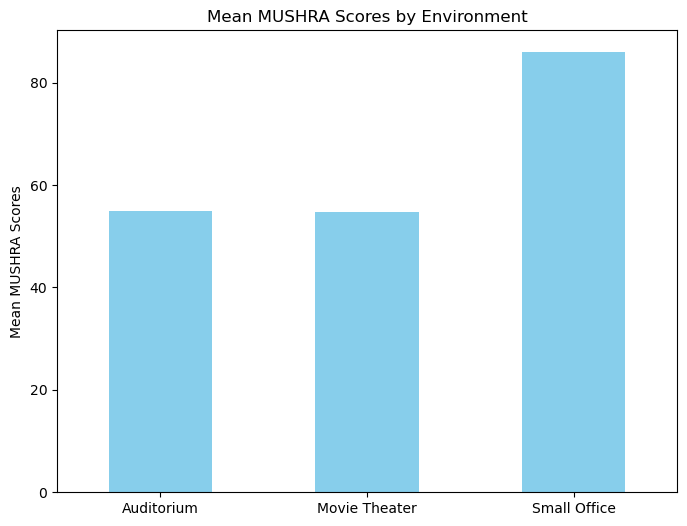

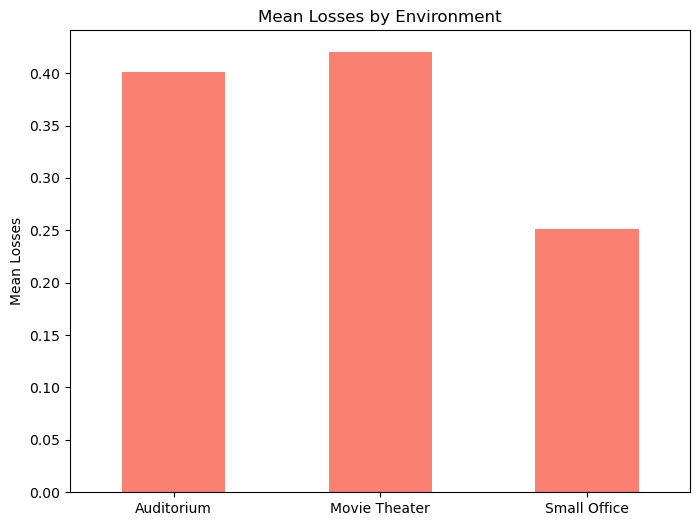

In [216]:
plt.figure(figsize=(8, 6))
mean_data.set_index('Environment')['MUSHRA Scores'].plot(kind='bar', color='skyblue')
plt.title('Mean MUSHRA Scores by Environment')
plt.ylabel('Mean MUSHRA Scores')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
mean_data.set_index('Environment')['Losses'].plot(kind='bar', color='salmon')
plt.title('Mean Losses by Environment')
plt.ylabel('Mean Losses')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


The Mean Mushra score graph shows that small office is the most similar audio when compared to original audio. This means that original audio and small office audios are felt the same to the human ears. The Mean losses graph also shows the least loss is of small office. This shows positive relation between psycho-acoustic loss function and Mushra test.

### <span style="color:blue"> END Report here </span>